## Задание к итоговому проекту по курсу "Python для анализа данных"

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing

### Описание данных

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

description = {
  'satisfaction_level': { 'title': 'Уровень удовлетворенности работой', 'is_category': False },
  'Last_evaluation': { 'title': 'Время с момента последней оценки в годах', 'is_category': False },
  'number_projects': { 'title': 'Количество проектов, выполненных за время работы', 'is_category': False },
  'average_monthly_hours': { 'title': 'Среднее количество часов на рабочем месте в месяц', 'is_category': False },
  'time_spend_company': { 'title': 'Стаж работы в компании в годах', 'is_category': False },
  'Work_accident': { 'title': 'Происходили ли несчастные случаи на рабочем месте с сотрудником', 'is_category': False },
  'left': { 'title': 'уволился ли сотрудник', 'is_category': False },
  'promotion_last_5years': { 'title': 'повышался ли сотрудник за последние пять лет', 'is_category': False },
  'department': { 'title': 'отдел в котором работает сотрудник', 'is_category': True },
  'salary': { 'title': 'относительный уровень зарплаты', 'is_category': True }
}

### Задание 1
Загрузите файл HR.csv в pandas dataframe

In [8]:
df = pd.read_csv('HR.csv', dtype={8: 'string', 9: 'string'})

### Подготовка данных
Пощупаем, что за данные нам достались

In [9]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  string 
 9   salary                 14999 non-null  string 
dtypes: float64(2), int64(6), string(2)
memory usage: 1.1 MB


In [12]:
df.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [ ]:
# есть ли пропуски
df.isnull().sum()

# пропущенных значений нет

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [ ]:
# посколько "департамент" и "зарплата" - это категории, проверим нет ли там странных значений

# Уникальные значения и их количество для колонки 'salary'
salary_counts = df['salary'].value_counts()
# Уникальные значения и их количество для колонки 'department'
department_counts = df['department'].value_counts()

# Вывод результатов
print("Уникальные значения для 'salary' и их количество:")
print(salary_counts)

print("\nУникальные значения для 'department' и их количество:")
print(department_counts)

# И тут нет ничего подозрительного.

Уникальные значения для 'salary' и их количество:
salary
low       7316
medium    6446
high      1237
Name: count, dtype: Int64

Уникальные значения для 'department' и их количество:
department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: Int64


### Задание 2
Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).

In [ ]:
# df.describe() - дает ответы на большинство этих вопросов,
# но тут смысл в том, чтобы подтвердить знание этих методов.

# делим на два разных: отдельно числовые колонки, отдельно колонки-категории
columns_to_copy = ['department', 'salary']
df_cat = df[columns_to_copy].copy()
df_num = df.drop(columns=columns_to_copy).copy()

# статистика числовых колонок
num_statistics = {
    'mean': df_num.mean(),
    'median': df_num.median(),
    'mode': df_num.mode().iloc[0],  # Берем первую моду, если их несколько
    'min': df_num.min(),
    'max': df_num.max(),
    'std_dev': df_num.std()
}

df_num_statistics = pd.DataFrame(num_statistics)
df_num_statistics


,mean,median,mode,min,max,std_dev
satisfaction_level,0.612834,0.64,0.10,0.09,1.0,0.248631
last_evaluation,0.716102,0.72,0.55,0.36,1.0,0.171169
number_project,3.803054,4.00,4.00,2.00,7.0,1.232592
average_montly_hours,201.050337,200.00,135.00,96.00,310.0,49.943099
time_spend_company,3.498233,3.00,3.00,2.00,10.0,1.460136
Work_accident,0.144610,0.00,0.00,0.00,1.0,0.351719
left,0.238083,0.00,0.00,0.00,1.0,0.425924
promotion_last_5years,0.021268,0.00,0.00,0.00,1.0,0.144281


In [46]:
# статистика колонок-категорий
cat_statistics = {
    'mode': df_num.mode().iloc[0],  # Берем первую моду, если их несколько
}

df_cat_statistics = pd.DataFrame(cat_statistics)
df_cat_statistics

,mode
satisfaction_level,0.10
last_evaluation,0.55
number_project,4.00
average_montly_hours,135.00
time_spend_company,3.00
Work_accident,0.00
left,0.00
promotion_last_5years,0.00


### Задание 3

Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных.
Определите две самые скоррелированные и две наименее скоррелированные переменные.

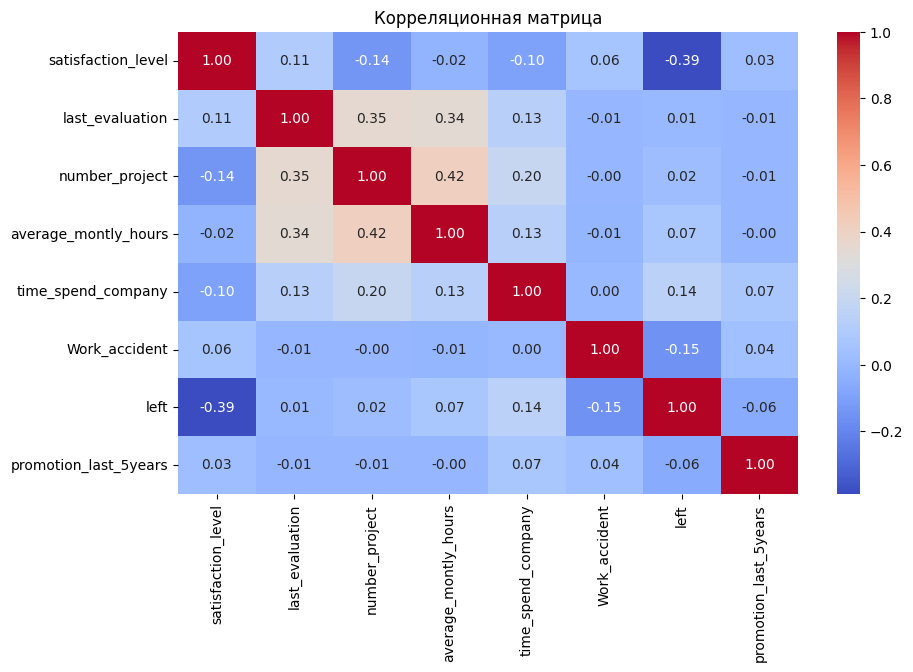

In [52]:
# Рассчет корреляционной матрицы
correlation_matrix = df_num.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

In [53]:
# Определение двух самых скоррелированных и двух наименее скоррелированных переменных
correlation_pairs = correlation_matrix.unstack().sort_values(ascending=False)

# Убираем самокорреляцию (где переменные равны)
correlation_pairs = correlation_pairs[correlation_pairs < 1]

# Две самые скоррелированные переменные
most_correlated = correlation_pairs.head(2)

# Две наименее скоррелированные переменные
least_correlated = correlation_pairs.tail(2)

print("Две самые скоррелированные переменные:")
print(most_correlated)

print("\nДве наименее скоррелированные переменные:")
print(least_correlated)

Две самые скоррелированные переменные:
number_project        average_montly_hours    0.417211
average_montly_hours  number_project          0.417211
dtype: float64

Две наименее скоррелированные переменные:
satisfaction_level  left                 -0.388375
left                satisfaction_level   -0.388375
dtype: float64


### Задание 4
Рассчитайте сколько сотрудников работает в каждом департаменте.

In [54]:
# Подсчет количества сотрудников в каждом департаменте
department_counts = df['department'].value_counts()

# Вывод результата
print("Количество сотрудников в каждом департаменте:")
print(department_counts)

Количество сотрудников в каждом департаменте:
department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: Int64


### Задание 5
Показать распределение сотрудников по зарплатам

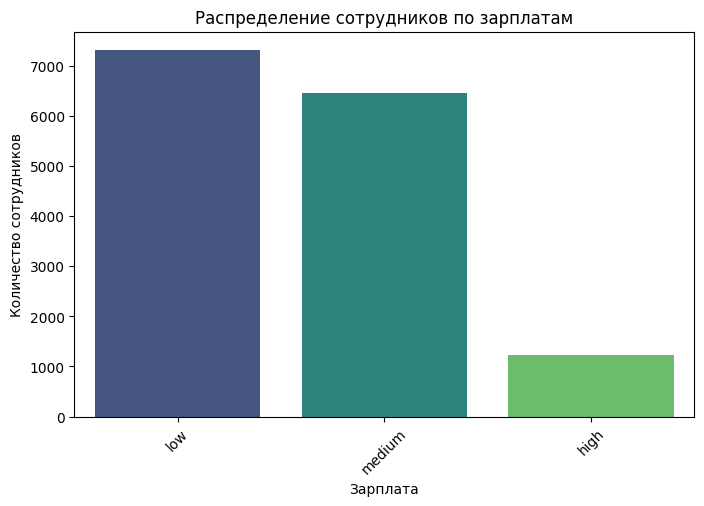

In [57]:
# Подсчет количества сотрудников по зарплатам
salary_distribution = df['salary'].value_counts()

# Визуализация распределения
plt.figure(figsize=(8, 5))
sns.barplot(x=salary_distribution.index, y=salary_distribution.values, hue=salary_distribution.index, palette='viridis')
plt.title('Распределение сотрудников по зарплатам')
plt.xlabel('Зарплата')
plt.ylabel('Количество сотрудников')
plt.xticks(rotation=45)
plt.show()

### Задание 6
Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

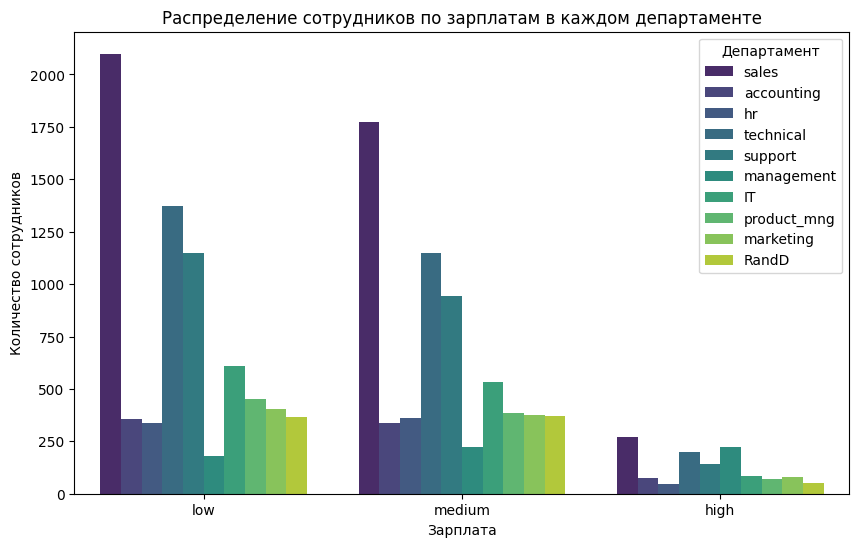

In [58]:
# Визуализация распределения сотрудников по зарплатам в каждом департаменте
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='salary', hue='department', palette='viridis')
plt.title('Распределение сотрудников по зарплатам в каждом департаменте')
plt.xlabel('Зарплата')
plt.ylabel('Количество сотрудников')
plt.legend(title='Департамент')
plt.show()

### Задание 7
Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [64]:
# Разделение данных по зарплатам
high_salary = df[df['salary'] == 'medium']['average_montly_hours']
low_salary = df[df['salary'] == 'low']['average_montly_hours']

# Проведение t-теста
t_stat, p_value = stats.ttest_ind(high_salary, low_salary, alternative='greater')

# Вывод результатов
print(f"T-статистика: {t_stat}")
print(f"P-значение: {p_value}")

# уровень значимости
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: сотрудники с высоким окладом проводят больше времени на работе.")
else:
    print("Нулевая гипотеза возможно верна: не хватает доказательств для отклонения нулевой гипотезы.")

# Вывод:
# 'сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом' - очень похоже на правду, судя по статистике.

T-статистика: 0.39900653336152675
P-значение: 0.34494729110162564
Нулевая гипотеза возможно верна: не хватает доказательств для отклонения нулевой гипотезы.


### Задание 8
Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
- Доля сотрудников с повышением за последние 5 лет
- Средняя степень удовлетворенности
- Среднее количество проектов

In [65]:
# Рассчет показателей для уволившихся (left = 1) и не уволившихся (left = 0) сотрудников
results = {}

for left_status in [0, 1]:
    filtered_df = df[df['left'] == left_status]
    
    # Доля сотрудников с повышением за последние 5 лет
    promotion_rate = filtered_df['promotion_last_5years'].mean()
    
    # Средняя степень удовлетворенности
    average_satisfaction = filtered_df['satisfaction_level'].mean()
    
    # Среднее количество проектов
    average_projects = filtered_df['number_project'].mean()
    
    results[left_status] = {
        'promotion_rate': promotion_rate,
        'average_satisfaction': average_satisfaction,
        'average_projects': average_projects
    }

# Вывод результатов
for status, metrics in results.items():
    status_str = "Уволившиеся" if status == 1 else "Не уволившиеся"
    print(f"{status_str} сотрудники:")
    print(f" - Доля сотрудников с повышением за последние 5 лет: {metrics['promotion_rate']:.2f}")
    print(f" - Средняя степень удовлетворенности: {metrics['average_satisfaction']:.2f}")
    print(f" - Среднее количество проектов: {metrics['average_projects']:.2f}\n")

Не уволившиеся сотрудники:
 - Доля сотрудников с повышением за последние 5 лет: 0.03
 - Средняя степень удовлетворенности: 0.67
 - Среднее количество проектов: 3.79

Уволившиеся сотрудники:
 - Доля сотрудников с повышением за последние 5 лет: 0.01
 - Средняя степень удовлетворенности: 0.44
 - Среднее количество проектов: 3.86



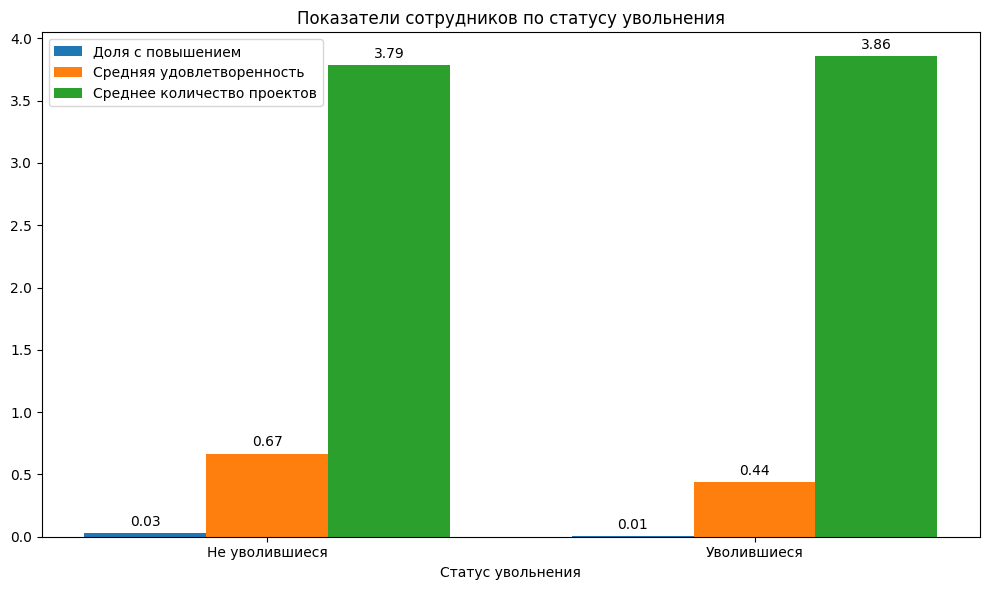

In [68]:
# Подготовка данных для графика
labels = ['Не уволившиеся', 'Уволившиеся']
promotion_rates = [results[0]['promotion_rate'], results[1]['promotion_rate']]
average_satisfactions = [results[0]['average_satisfaction'], results[1]['average_satisfaction']]
average_projects = [results[0]['average_projects'], results[1]['average_projects']]

x = np.arange(len(labels))  # метки по оси X
width = 0.25  # ширина столбцов

# Создание графика
fig, ax = plt.subplots(figsize=(10, 6))

# Добавление столбцов на график
bars1 = ax.bar(x - width, promotion_rates, width, label='Доля с повышением')
bars2 = ax.bar(x, average_satisfactions, width, label='Средняя удовлетворенность')
bars3 = ax.bar(x + width, average_projects, width, label='Среднее количество проектов')

# Добавление меток и заголовка
ax.set_xlabel('Статус увольнения')
ax.set_title('Показатели сотрудников по статусу увольнения')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Отображение значений над столбцами
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height), 
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points", 
                    ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)

# Показ графика
plt.tight_layout()
plt.show()

### Задание 9
Разделить данные на тестовую и обучающую выборки.
Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).
Оценить качество модели на тестовой выборке.

In [79]:
# Разделение данных на обучающую и тестовую выборки
X = df_num.drop('left', axis=1)  # Признаки
y = df_num['left']  # Целевая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = lda.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Вывод результатов
print(f"Точность модели: {accuracy:.2f}")
print("\nМатрица ошибок:")
print(conf_matrix)
print("\nОтчет о классификации:")
print(class_report)


Точность модели: 0.75

Матрица ошибок:
[[2094  200]
 [ 540  166]]

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      2294
           1       0.45      0.24      0.31       706

    accuracy                           0.75      3000
   macro avg       0.62      0.57      0.58      3000
weighted avg       0.71      0.75      0.72      3000



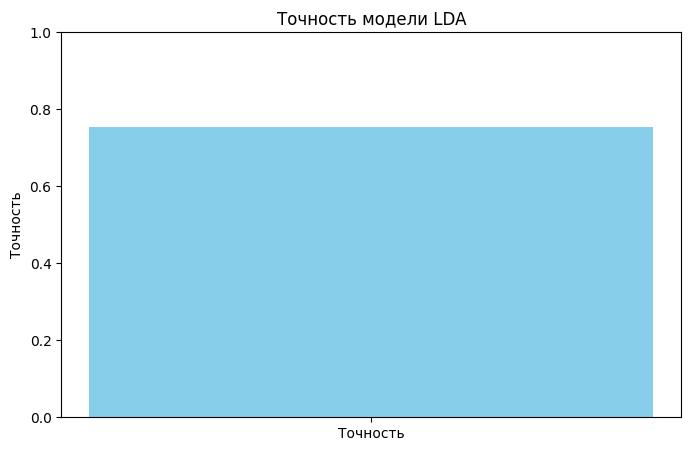

In [80]:
# Визуализация точности модели
plt.figure(figsize=(8, 5))
plt.bar(['Точность'], [accuracy], color='skyblue')
plt.ylim(0, 1)
plt.title('Точность модели LDA')
plt.ylabel('Точность')
plt.show()

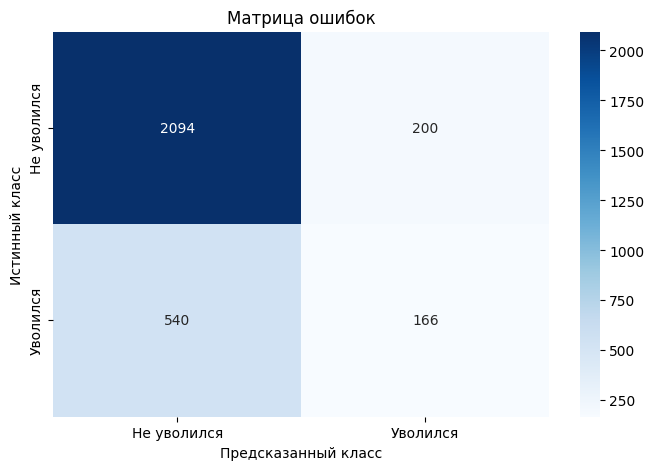

In [81]:
# Визуализация матрицы ошибок
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Не уволился', 'Уволился'], yticklabels=['Не уволился', 'Уволился'])
plt.title('Матрица ошибок')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()

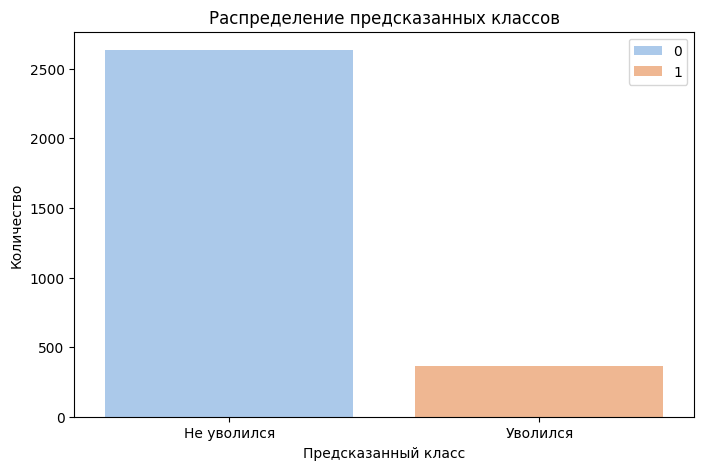

In [83]:
# Распределение предсказанных классов
plt.figure(figsize=(8, 5))
sns.countplot(x=y_pred, hue=y_pred, palette='pastel')
plt.title('Распределение предсказанных классов')
plt.xlabel('Предсказанный класс')
plt.ylabel('Количество')
plt.xticks([0, 1], ['Не уволился', 'Уволился'])
plt.show()

### Задание 10
Загрузить jupyter notebook с решение на github и прислать ссылку

[https://github.com/ringill/pyda/blob/main/final/solution.ipynb](https://github.com/ringill/pyda/blob/main/final/solution.ipynb)